# MultiMNIST Dataset Creation

## Setup

In [1]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
from torchvision.transforms import transforms

seed = 0
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [2]:
train_dataset = datasets.MNIST(root='/home/mila/j/jithendaraa.subramanian/scratch/mnist_data/', train=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='/home/mila/j/jithendaraa.subramanian/scratch/mnist_data/', train=False, transform=transforms.ToTensor())
train_loader = DataLoader(dataset=train_dataset, batch_size=1, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)

## Train Data

In [3]:
l_array = []
l_label = []

In [4]:
for image, label in train_loader:
    l_array.append(image.cpu().detach().numpy().copy().squeeze(0).squeeze(0))
    l_label.append(label.item())

In [5]:
l_idx = [i for i in range(60000)]
np.random.shuffle(l_idx)

In [6]:
multi_train = np.zeros((60000, 28, 28), dtype=np.float32)
multi_train_labels = []

In [7]:
multi_train[:, :28, :28] += np.array(l_array)[l_idx]

In [8]:
multi_train = multi_train.clip(0.0, 1.0)

In [9]:
multi_train_labels = [l_label[l_idx[i]] for i in range(60000)]

In [10]:
multi_train.shape

(60000, 28, 28)

In [11]:
root = '/home/mila/j/jithendaraa.subramanian/scratch/mnist_data/'
np.save(root+"train_images.npy", np.array(multi_train, dtype=np.float32))
np.save(root+"train_labels.npy", np.array(multi_train_labels, dtype=int))

## Test Data

In [12]:
l_array = []
l_label = []

In [13]:
for image, label in test_loader:
    l_array.append(image.cpu().detach().numpy().copy().squeeze(0).squeeze(0))
    l_label.append(label.item())

In [14]:
l_idx = [i for i in range(10000)]
np.random.shuffle(l_idx)

In [15]:
multi_test = np.zeros((10000, 28, 28), dtype=np.float32)
multi_test_labels = []

In [16]:
multi_test[:, :28, :28] += np.array(l_array)[l_idx]

In [17]:
multi_test = multi_test.clip(0.0, 1.0)

In [18]:
multi_test_labels = [l_label[l_idx[i]] for i in range(10000)]

In [19]:
np.save(root+"test_images.npy", np.array(multi_test, dtype=np.float32))
np.save(root+"test_labels.npy", np.array(multi_test_labels, dtype=int))

# Context-bit for tasks

In [21]:
train_images = np.load(root+"train_images.npy")
train_labels = np.load(root+"train_labels.npy")
test_images = np.load(root+"test_images.npy")
test_labels = np.load(root+"test_labels.npy")

# Row-wise

# Single L

In [26]:
train_images_l = np.append(train_images, np.zeros((60000, 28, 1), dtype=np.float32), axis=2)

In [27]:
train_images_l.shape

(60000, 36, 37)

In [23]:
plt.imshow(train_images[10])

In [29]:
train_labels_l = train_labels[:, 0]

In [30]:
train_labels_l.shape

(60000,)

In [31]:
train_labels_l[10]

5

In [32]:
np.save("train_images_row_l.npy", train_images_l)
np.save("train_labels_row_l.npy", train_labels_l)

In [33]:
test_images_l = np.append(test_images, np.zeros((10000, 36, 1), dtype=np.float32), axis=2)

In [34]:
test_images_l.shape

(10000, 36, 37)

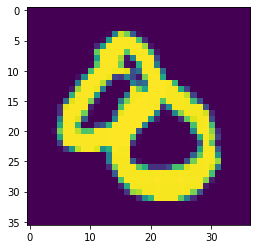

In [35]:
plt.imshow(test_images_l[10])

In [36]:
test_labels_l = test_labels[:, 0]

In [37]:
test_labels_l.shape

(10000,)

In [38]:
test_labels_l[10]

0

In [39]:
np.save("test_images_row_l.npy", test_images_l)
np.save("test_labels_row_l.npy", test_labels_l)

# Single R

In [40]:
train_images_r = np.append(train_images, np.ones((60000, 36, 1), dtype=np.float32), axis=2)

In [41]:
train_images_r.shape

(60000, 36, 37)

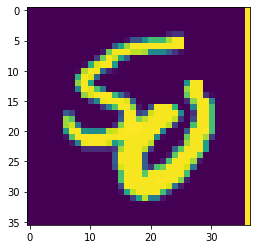

In [42]:
plt.imshow(train_images_r[10])

In [43]:
train_labels_r = train_labels[:, 1]

In [44]:
train_labels_r.shape

(60000,)

In [45]:
train_labels_r[10]

0

In [46]:
np.save("train_images_row_r.npy", train_images_r)
np.save("train_labels_row_r.npy", train_labels_r)

In [47]:
test_images_r = np.append(test_images, np.ones((10000, 36, 1), dtype=np.float32), axis=2)

In [48]:
test_images_r.shape

(10000, 36, 37)

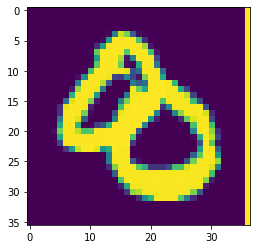

In [49]:
plt.imshow(test_images_r[10])

In [50]:
test_labels_r = test_labels[:, 1]

In [51]:
test_labels_r.shape

(10000,)

In [52]:
test_labels_r[10]

0

In [53]:
np.save("test_images_row_r.npy", test_images_r)
np.save("test_labels_row_r.npy", test_labels_r)

# Multi shuffled

In [54]:
lrs = np.array([[[0.] for _ in range(36)]] * 30000 + [[[1.] for _ in range(36)]] * 30000, dtype=np.float32)
np.random.shuffle(lrs)

In [55]:
lrs

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)

In [56]:
lrs.shape

(60000, 36, 1)

In [57]:
lrs.dtype

dtype('float32')

In [58]:
for i in lrs:
    s = i.sum()
    if s!=36 and s!=0:
        print(s)

In [59]:
train_images_lr = np.append(train_images, lrs, axis=2)

In [60]:
train_images_lr.shape

(60000, 36, 37)

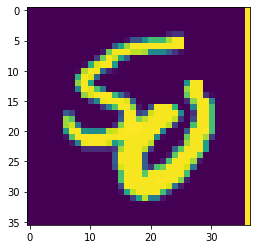

In [61]:
plt.imshow(train_images_lr[10])

In [62]:
train_labels_lr = np.take_along_axis(train_labels, train_images_lr[:, 0, -1].astype(int).reshape(-1, 1), axis=1).flatten()

In [63]:
train_labels_lr

array([3, 6, 6, ..., 7, 1, 4])

In [64]:
train_labels_lr[10]

0

In [65]:
train_labels_lr.shape

(60000,)

In [66]:
np.save("train_images_row_lr.npy", train_images_lr)
np.save("train_labels_row_lr.npy", train_labels_lr)

In [67]:
lrs = np.array([[[0.] for _ in range(36)]] * 5000 + [[[1.] for _ in range(36)]] * 5000, dtype=np.float32)
np.random.shuffle(lrs)

In [68]:
test_images_lr = np.append(test_images, lrs, axis=2)

In [69]:
test_images_lr.shape

(10000, 36, 37)

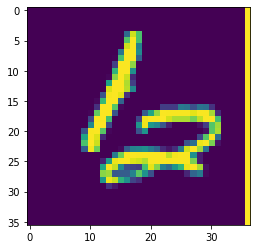

In [70]:
plt.imshow(test_images_lr[34])

In [71]:
test_labels_lr = np.take_along_axis(test_labels, test_images_lr[:, 0, -1].astype(int).reshape(-1, 1), axis=1).flatten()

In [72]:
test_labels_r.shape

(10000,)

In [73]:
test_labels_lr[34]

2

In [74]:
np.save("test_images_row_lr.npy", test_images_lr)
np.save("test_labels_row_lr.npy", test_labels_lr)

# Column-wise

# Single L

In [75]:
train_images_l = np.append(train_images.transpose(0, 2, 1), np.zeros((60000, 36, 1), dtype=np.float32), axis=2)

In [76]:
train_images_l.shape

(60000, 36, 37)

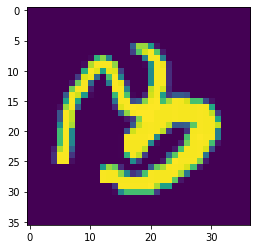

In [77]:
plt.imshow(train_images_l[10])

In [78]:
train_labels_l = train_labels[:, 0]

In [79]:
train_labels_l.shape

(60000,)

In [80]:
train_labels_l[10]

5

In [81]:
np.save("train_images_column_l.npy", train_images_l)
np.save("train_labels_column_l.npy", train_labels_l)

In [82]:
test_images_l = np.append(test_images.transpose(0, 2, 1), np.zeros((10000, 36, 1), dtype=np.float32), axis=2)

In [83]:
test_images_l.shape

(10000, 36, 37)

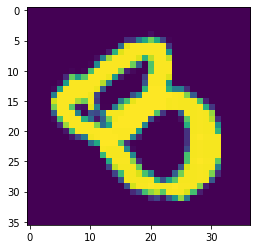

In [84]:
plt.imshow(test_images_l[10])

In [85]:
test_labels_l = test_labels[:, 0]

In [86]:
test_labels_l.shape

(10000,)

In [87]:
test_labels_l[10]

0

In [88]:
np.save("test_images_column_l.npy", test_images_l)
np.save("test_labels_column_l.npy", test_labels_l)

# Single R

In [89]:
train_images_r = np.append(train_images.transpose(0, 2, 1), np.ones((60000, 36, 1), dtype=np.float32), axis=2)

In [90]:
train_images_r.shape

(60000, 36, 37)

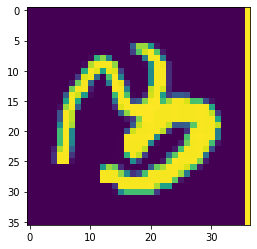

In [91]:
plt.imshow(train_images_r[10])

In [92]:
train_labels_r = train_labels[:, 1]

In [93]:
train_labels_r.shape

(60000,)

In [94]:
train_labels_r[10]

0

In [95]:
np.save("train_images_column_r.npy", train_images_r)
np.save("train_labels_column_r.npy", train_labels_r)

In [96]:
test_images_r = np.append(test_images.transpose(0, 2, 1), np.ones((10000, 36, 1), dtype=np.float32), axis=2)

In [97]:
test_images_r.shape

(10000, 36, 37)

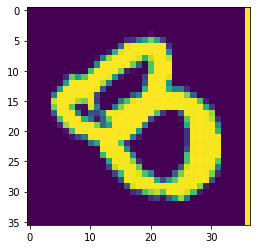

In [98]:
plt.imshow(test_images_r[10])

In [99]:
test_labels_r = test_labels[:, 1]

In [100]:
test_labels_r.shape

(10000,)

In [101]:
test_labels_r[10]

0

In [102]:
np.save("test_images_column_r.npy", test_images_r)
np.save("test_labels_column_r.npy", test_labels_r)

# Multi shuffled

In [103]:
lrs = np.array([[[0.] for _ in range(36)]] * 30000 + [[[1.] for _ in range(36)]] * 30000, dtype=np.float32)
np.random.shuffle(lrs)

In [104]:
lrs

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]], dtype=float32)

In [105]:
lrs.shape

(60000, 36, 1)

In [106]:
lrs.dtype

dtype('float32')

In [107]:
for i in lrs:
    s = i.sum()
    if s!=36 and s!=0:
        print(s)

In [108]:
train_images_lr = np.append(train_images.transpose(0, 2, 1), lrs, axis=2)

In [109]:
train_images_lr.shape

(60000, 36, 37)

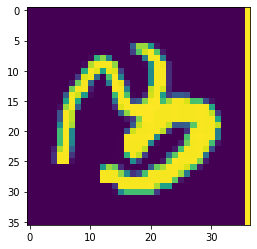

In [110]:
plt.imshow(train_images_lr[10])

In [111]:
train_labels_lr = np.take_along_axis(train_labels, train_images_lr[:, 0, -1].astype(int).reshape(-1, 1), axis=1).flatten()

In [112]:
train_labels_lr

array([3, 6, 6, ..., 0, 1, 3])

In [113]:
train_labels_lr[10]

0

In [114]:
train_labels_lr.shape

(60000,)

In [115]:
np.save("train_images_column_lr.npy", train_images_lr)
np.save("train_labels_column_lr.npy", train_labels_lr)

In [116]:
lrs = np.array([[[0.] for _ in range(36)]] * 5000 + [[[1.] for _ in range(36)]] * 5000, dtype=np.float32)
np.random.shuffle(lrs)

In [117]:
test_images_lr = np.append(test_images.transpose(0, 2, 1), lrs, axis=2)

In [118]:
test_images_lr.shape

(10000, 36, 37)

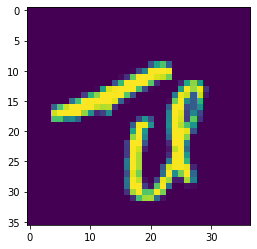

In [119]:
plt.imshow(test_images_lr[34])

In [120]:
test_labels_lr = np.take_along_axis(test_labels, test_images_lr[:, 0, -1].astype(int).reshape(-1, 1), axis=1).flatten()

In [121]:
test_labels_r.shape

(10000,)

In [122]:
test_labels_lr[34]

1

In [123]:
np.save("test_images_column_lr.npy", test_images_lr)
np.save("test_labels_column_lr.npy", test_labels_lr)